In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [2]:
import pandas as pd

df = pd.read_excel (r'C:\Users\asus\Documents\Web Scraping for project\ipl_final_12Jan.xlsx')
df.drop(["Player", "Team"], axis=1, inplace=True)
cluster_array= np.array(df)
cluster_array

array([[4.0e+06, 1.6e+01, 1.6e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.6e+07, 1.6e+01, 1.6e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.1e+08, 1.3e+01, 1.3e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [2.0e+06, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.5e+07, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [7.5e+06, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00]])

In [3]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [4]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [5]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [6]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [7]:
k = 3
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(100):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 22157898065762452
1 16389633823028496
2 14400106522281114
3 13010628060826738
4 12176055876994186
5 10396489137944968
6 9572501738363434
7 9495967795724526
8 9495967795724526
9 9495967795724526
10 9495967795724526
11 9495967795724526
12 9495967795724526
13 9495967795724526
14 9495967795724526
15 9495967795724526
16 9495967795724526
17 9495967795724526
18 9495967795724526
19 9495967795724526
20 9495967795724526
21 9495967795724526
22 9495967795724526
23 9495967795724526
24 9495967795724526
25 9495967795724526
26 9495967795724526
27 9495967795724526
28 9495967795724526
29 9495967795724526
30 9495967795724526
31 9495967795724526
32 9495967795724526
33 9495967795724526
34 9495967795724526
35 9495967795724526
36 9495967795724526
37 9495967795724526
38 9495967795724526
39 9495967795724526
40 9495967795724526
41 9495967795724526
42 9495967795724526
43 9495967795724526
44 9495967795724526
45 9495967795724526
46 9495967795724526
47 9495967795724526
48 9495967795724526
49 9495967795724526
50 9

In [8]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

<ipython-input-8-bd897d61dd29>:35: RuntimeWarning: divide by zero encountered in true_divide
  if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
<ipython-input-8-bd897d61dd29>:36: RuntimeWarning: divide by zero encountered in true_divide
  print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
<ipython-input-8-bd897d61dd29>:35: RuntimeWarning: invalid value encountered in true_divide
  if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:


inf
724.2813313647381


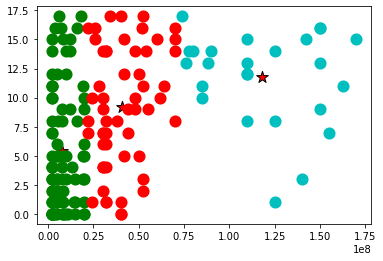

In [12]:
colors = 10*["g","r","c","b","k"]
clf = K_Means()
clf.fit(cluster_array)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="*", color="red", s=150, edgecolor='black')

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=50, )
        
plt.show()